# Exploratory Data Analysis in MNE Python

## Re-Importing The Re-Structured Dataset

In [17]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [2]:
data = mne.read_epochs('/Users/anastasiakuzmich/epochs-epo.fif', preload=False)

Reading /Users/anastasiakuzmich/epochs-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     499.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated


## Pre-Processing: Setting up a band-pass filter 

In [4]:
data.load_data()
data = data.filter(l_freq=.1, h_freq=30)

Loading data for 477 events and 700 original time points ...
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_69705/822012624.py:2: RuntimeWarning: filter_length (33001) is longer than the signal (700), distortion is likely. Reduce filter length or filter a longer signal.
  data = data.filter(l_freq=.1, h_freq=30)


## Visualising the Average Activity Traces

### Average activity trace across all channels and epochs

Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


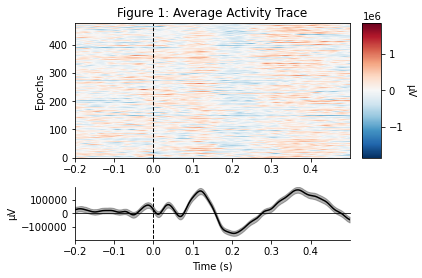

In [9]:
data.plot_image(combine='mean', show=True, title='Figure 1: Average Activity Trace');

### Activity traces averaged by coherence levels

✏️ 45% coherence = easiest, 20% coherence = hardest

In [53]:
coherence_level_dict = {"1" : "20%",
                        "2": "25%",
                        "3" : "30%",
                        "4" : "35%",
                        "5" : "40%",
                        "6" : "45%"}

Not setting metadata
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


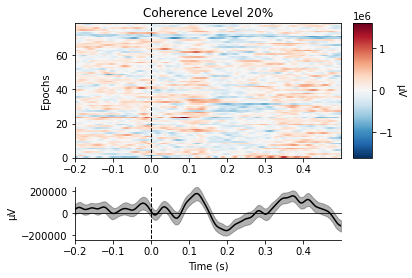

Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


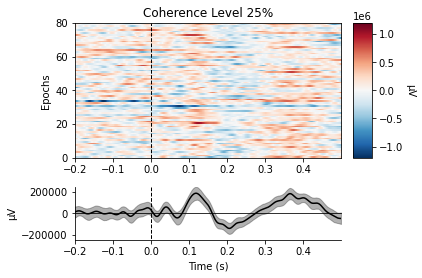

Not setting metadata
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


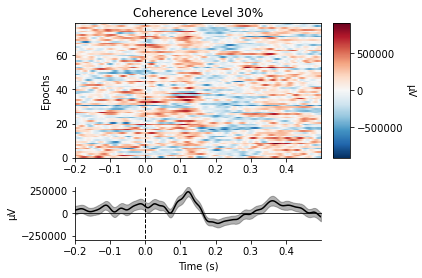

Not setting metadata
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


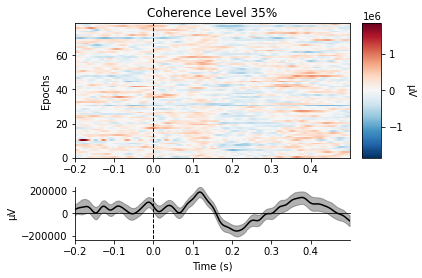

Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


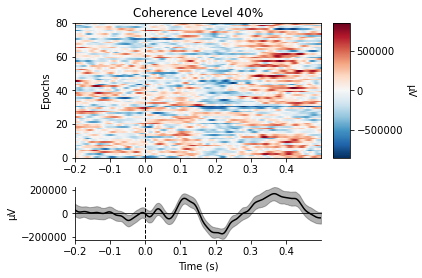

Not setting metadata
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


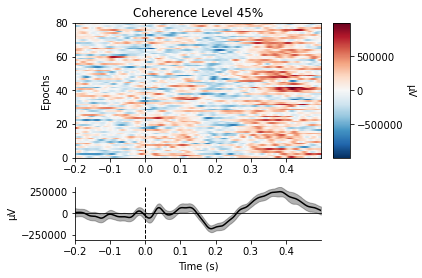

In [54]:
for key, value in coherence_level_dict.items():
    data[key].plot_image(picks='eeg', combine='mean', title = "Coherence Level %s" % value)

### Activity traces averaged by trial type

Not setting metadata
Not setting metadata
239 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


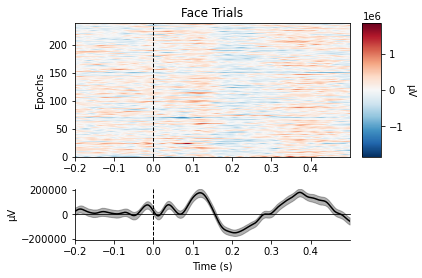

Not setting metadata
Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


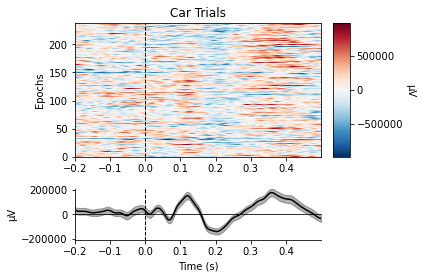

In [49]:
data['face'].plot_image(picks='eeg', combine='mean', title = "Face Trials")
data['car'].plot_image(picks='eeg', combine='mean', title = "Car Trials");

### Averaged activity traces at individual channels of interest

Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


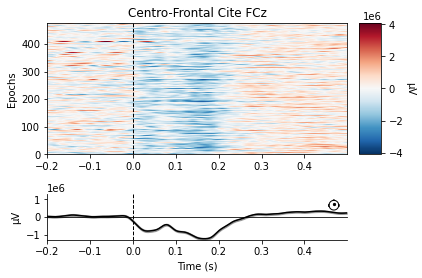

Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


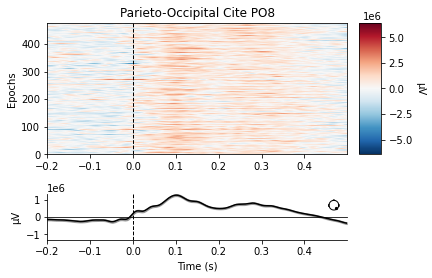

In [51]:
data.plot_image(picks=['FCz'], title = "Centro-Frontal Cite FCz")
data.plot_image(picks=['PO8'], title = "Parieto-Occipital Cite PO8");

## Visualising the Evoked Responses

### All Epochs: Evoked Responses and Topographies 

In [97]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [98]:
evoked_responses = data.average()

No projector specified for this dataset. Please consider the method self.add_proj.


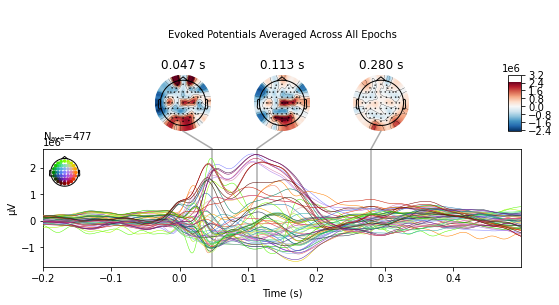

In [99]:
evoked_responses.plot_joint(title="Evoked Potentials Averaged Across All Epochs");

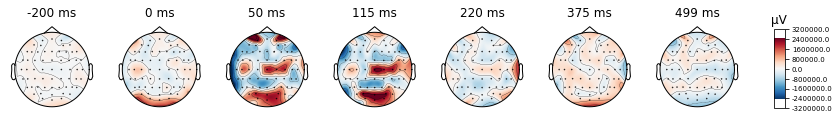

In [100]:
times = [-0.2, 0, 0.05, 0.115, 0.220, 0.375, 0.499] # times of interest
evoked_responses.plot_topomap(times, time_unit='ms', outlines='head', extrapolate='box');

### Face vs Car

No projector specified for this dataset. Please consider the method self.add_proj.


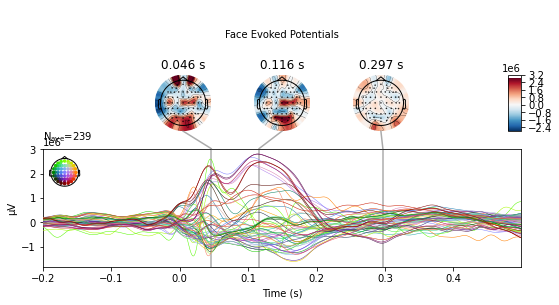

No projector specified for this dataset. Please consider the method self.add_proj.


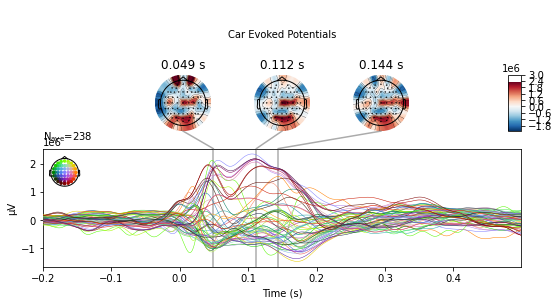

In [101]:
face_evoked_responses = data['face'].average()
car_evoked_responses = data['car'].average()

face_evoked_responses.plot_joint(title="Face Evoked Potentials")
car_evoked_responses.plot_joint(title="Car Evoked Potentials");

### High vs Low Coherence

No projector specified for this dataset. Please consider the method self.add_proj.


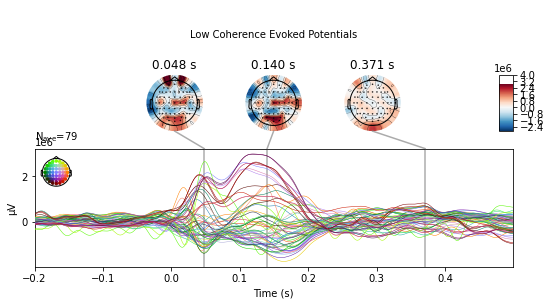

No projector specified for this dataset. Please consider the method self.add_proj.


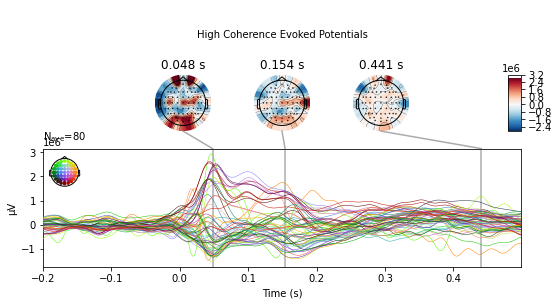

In [102]:
low_coherence_evoked = data['1'].average()
high_coherence_evoked = data['6'].average()

low_coherence_evoked.plot_joint(title="Low Coherence Evoked Potentials")
high_coherence_evoked.plot_joint(title="High Coherence Evoked Potentials");

## Further Inspection of Trial-Related Evoked Response Differences

### Evoked Responses:  Face vs Car + High vs Low Coherence

In [112]:
low_coherence_face = data['face/1'].average()
low_coherence_car = data['car/1'].average()
high_coherence_face = data['face/6'].average()
high_coherence_car = data['car/6'].average()

conditional_evoked_responses = low_coherence_face, high_coherence_face, low_coherence_car, high_coherence_car

conditions = ('face/low',
              'face/high', 
              'car/low', 
              'car/high')

evks = dict(zip(conditions, conditional_evoked_responses))

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


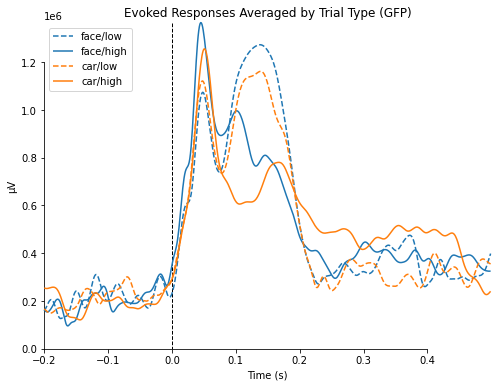

In [116]:
mne.viz.plot_compare_evokeds(evks, 
                             colors = dict(face=0, car=1),
                             linestyles = dict(high='solid', low='dashed'), 
                             combine='gfp',
                             title = "Evoked Responses Averaged by Trial Type");

### Evoked Responses Across Coherence Levels

In [123]:
ev20 = data['1'].average()
ev25 = data['2'].average()
ev30 = data['3'].average()
ev35 = data['4'].average()
ev40 = data['5'].average()
ev45 = data['6'].average()

coherence_conditional_evoked_responses = ev20, ev25, ev30, ev35, ev40, ev45
coherence_levels = ('20%', '25%', '30%', '35%', '40%', '45%')

evks = dict(zip(coherence_levels, coherence_conditional_evoked_responses))

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


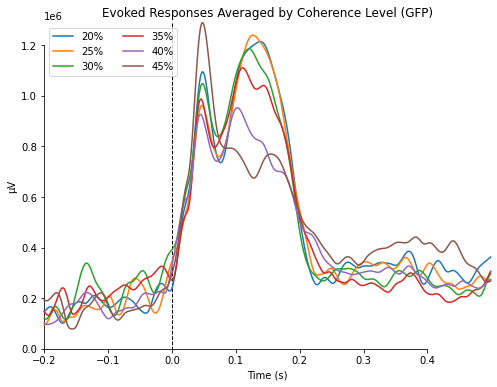

In [125]:
mne.viz.plot_compare_evokeds(evks, 
                             picks='eeg',
                             combine='gfp',
                             title = "Evoked Responses Averaged by Coherence Level");

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


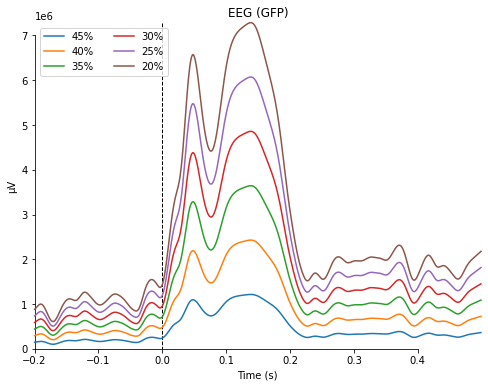

In [137]:
# Compare coherence-related differences in evoked response
temp_list = list()

for idx, _comment in enumerate(('45%', '40%', '35%', '30%', '25%', '20%'), start=1):
    _evk = coherence_conditional_evoked_responses[0].copy()
    _evk.comment = _comment
    _evk.data *= idx  # so we can tell the traces apart
    temp_list.append(_evk)
    
mne.viz.plot_compare_evokeds(temp_list, picks='eeg', combine='gfp');

#### Evoked Responses across Coherence Levels at Channels of Interest

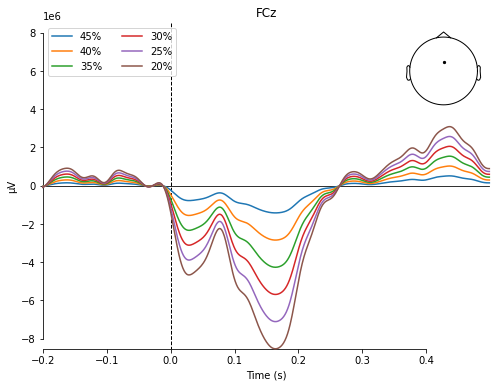

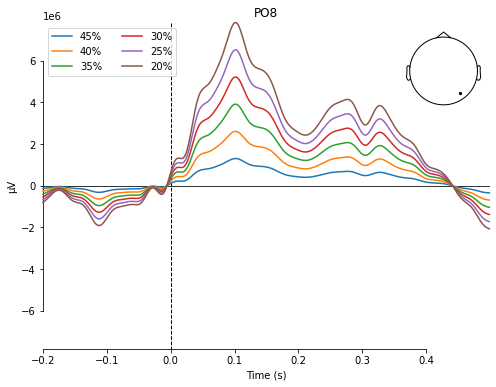

In [138]:
mne.viz.plot_compare_evokeds(temp_list, picks='FCz')
mne.viz.plot_compare_evokeds(temp_list, picks='PO8');

## Testing the MNE ICA functions
https://mne.tools/0.15/manual/preprocessing/ica.html

In [140]:
ica = ICA(n_components=60, 
          max_iter='auto', 
          method='fastica')

ica.fit(data)

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 60 components
Fitting ICA took 57.4s.


<ICA | epochs decomposition, fit (fastica): 333900 samples, 60 components, channels used: "eeg">

Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_69705/3858567737.py:3: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  ica.plot_sources(data, show_scrollbars=False);


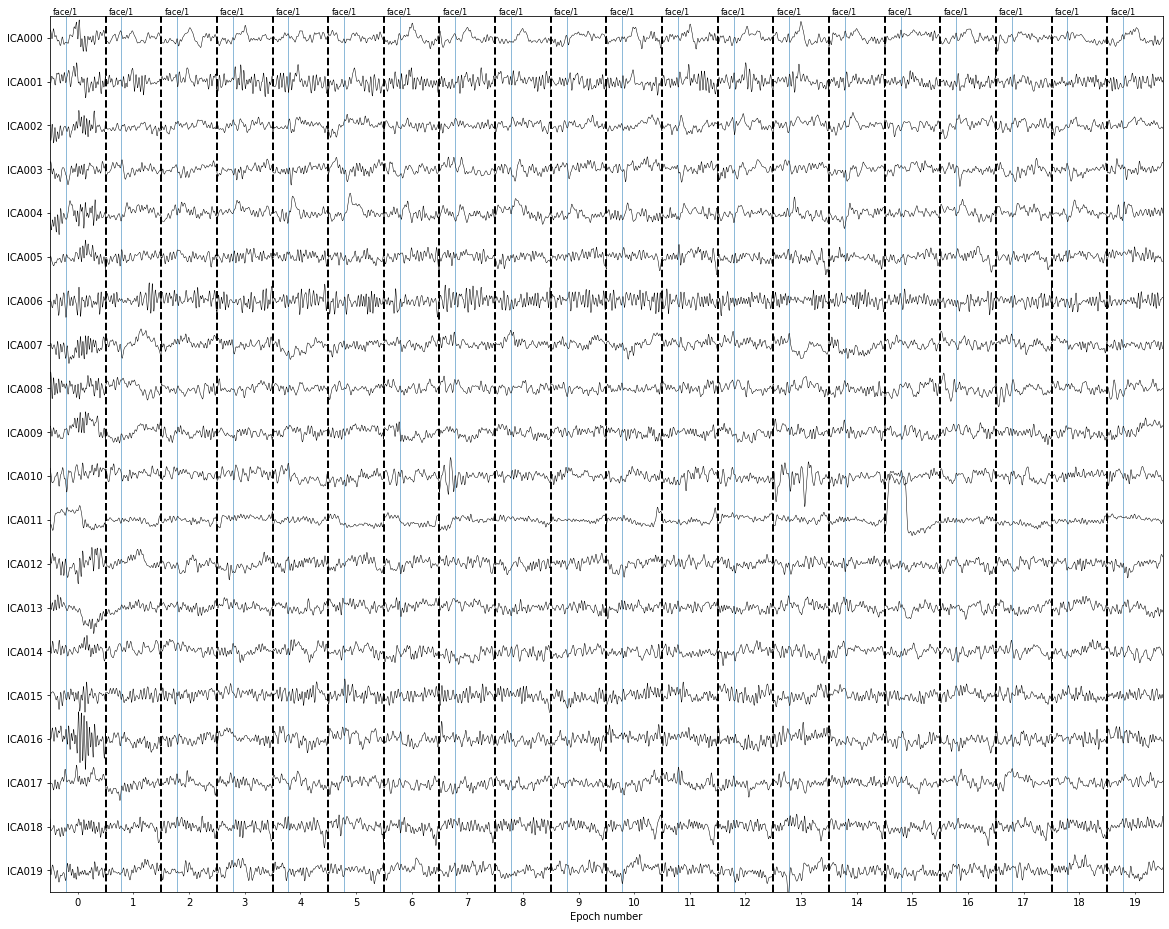

In [142]:
# Plot sources

ica.plot_sources(data, show_scrollbars=False);

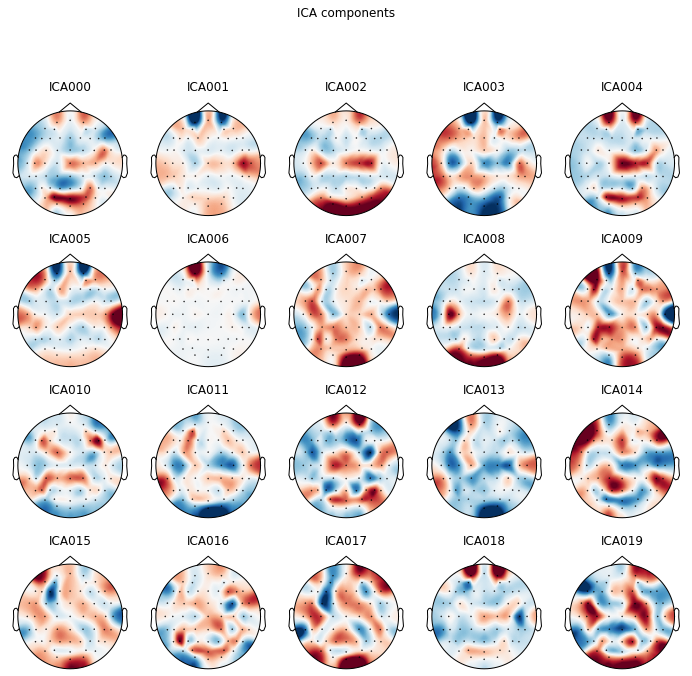

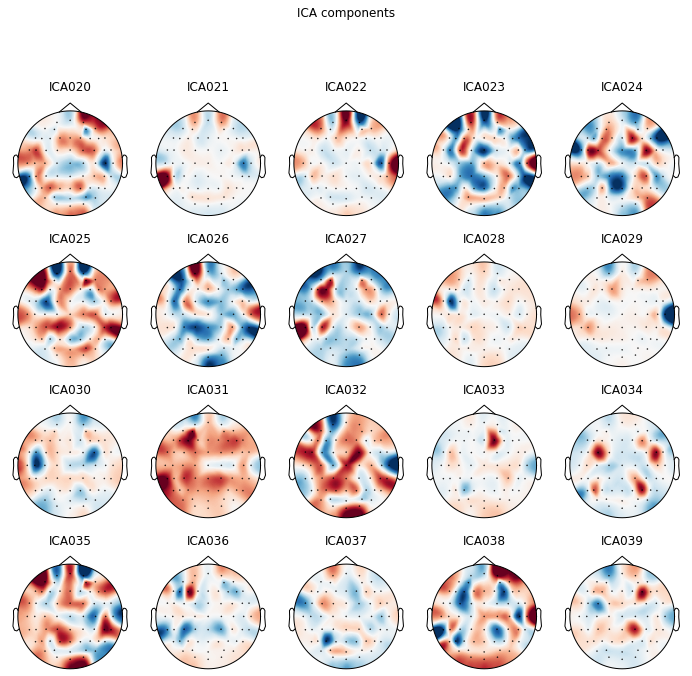

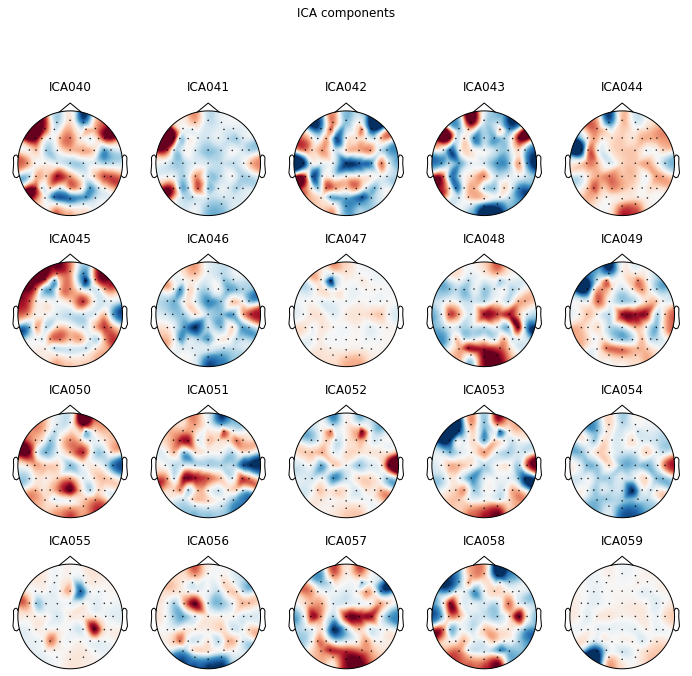

In [143]:
# Plot components

ica.plot_components(contours=0, 
                    inst=data, 
                    plot_std=True);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


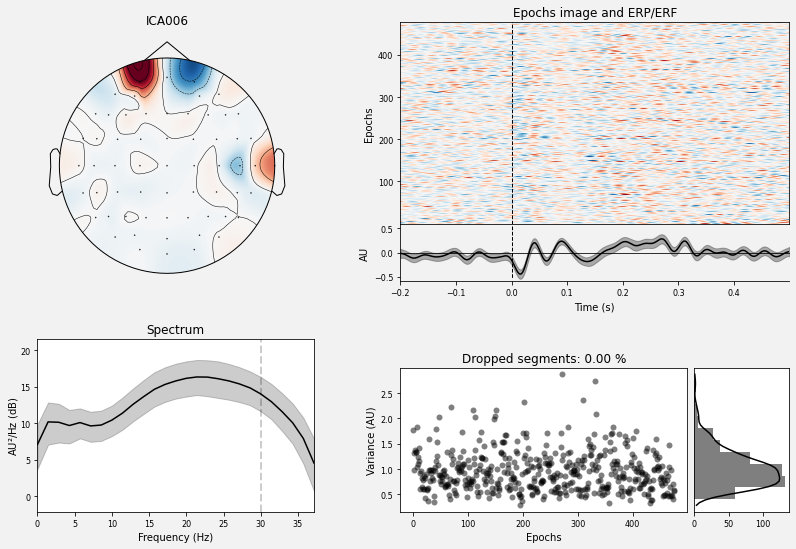

In [148]:
ica.plot_properties(data, 
                    picks=[6], 
                    plot_std=True, 
                    figsize=[12, 8]);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


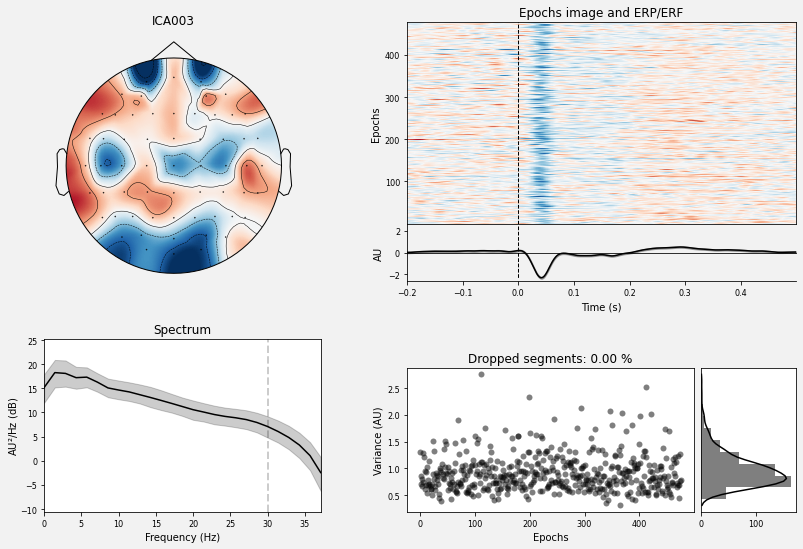

In [149]:
ica.plot_properties(data, 
                    picks=[3], 
                    plot_std=True, 
                    figsize=[12, 8]);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


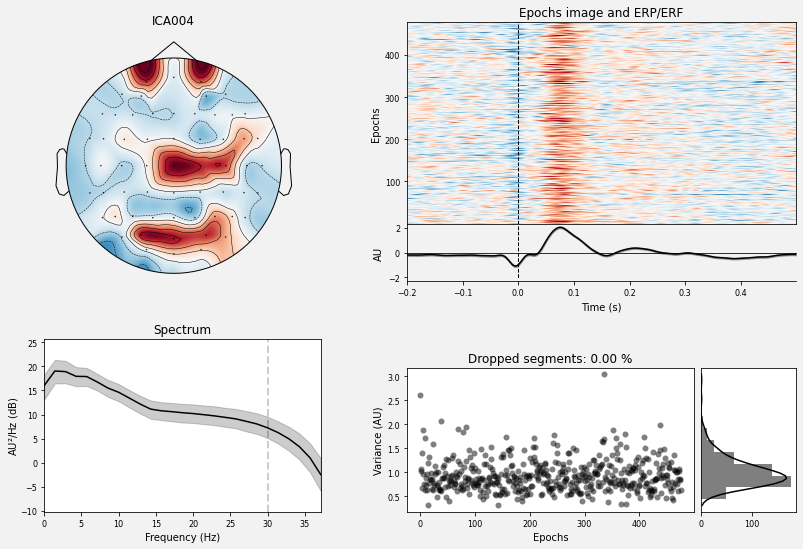

In [150]:
ica.plot_properties(data, 
                    picks=[4], 
                    plot_std=True, 
                    figsize=[12, 8]);